### <center> **End of Semester Exam - Big Data Analytics for Business**
##### <center> Masters in Applied Informatics (IT Innovations in Business)
##### <center> Ural Federal University, Yekaterinburg, Russian Federation.
##### <center> 2022/23 Academic Year
----
### <center> **Olympics Games (Олимпийские игры)**

# <center> ![](https://png.pngitem.com/pimgs/s/469-4697170_olympic-rings-hd-png-download.png)

**Name:** Maksim Shutkov

**Group №:** RIM-120981

---

**Task:** As an analyst, you have been given the task of identifying all kinds of interesting facts about the Olympic Games in the data using the data engineering, analytics and visualization tools. 

Use the python notebook to perform your analysis with comments and markdown text also

* Download the data here: https://disk.yandex.ru/d/aJERq9WdoFR5HQ

**Data Description:**

- __ID__ - Уникальный номер атлета (Athlete's unique number)
- __Name__ - Имя атлета
- __Sex__ - Пол 
- __Age__ - Возраст 
- __Height__ - Рост (см / cm) 
- __Weight__ - Вес (кг / kg) 
- __Team__ - Название команды 
- __NOC__ - Код Нац.олимп. коммитета (National Olympic Committee 3-letter code)
- __Games__ - Год и сезон проведения игр (Year and season of games)
- __Year__ - Год проведения игр
- __Season__ -сезон проведения игр
- __City__ - Город проведения игр
- __Sport__ - Вид спорта
- __Event__ - Событие
- __Medal__ - Медаль (Gold, Silver, Bronze, или NA)

-----

**Disclaimer:-** Extra scores will be given for creativity and clarity of analytical results.  

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics. Overall facts on a dataset

In [4]:
#Loading the 
df = pd.read_csv('olympic_games.csv') 
df
#Performing a descriptive stat. analysis on the DataFrame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [44]:
df.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


**Descriptive statistics**

  **Numerical data**

*   ***Age -*** According to the retrieved statistics the **average** of athletes is ***25.5 years***. This is reasonable because this age usually signifies the physical peak for the majority of people 
The youngest participant was ***10 years old*** and the **oldest 97 years**
*   ***Height -*** The **average height** of an athlete is **equal to 175cm** (*however it is important to note that there both sexes indluded*). **Tallest** athlete was **226cm**, **shortest** was **127** cm.
*   ***Weight -*** **Average weight** for an Olympic participant equals to **roughtly 71 kilograms** (*again it is important to note that both sexes included here*). The **heaviest** athlete was at the **214 kilograms**. The **lightest** at **25 kilos**.
*   ***Year -*** First Olympic games dated in the given datasen were held in 1896 (**Summer Olympics in Athens**). And the lates were in 2016 (**Rio Olympic Games**)

**Non-Numerical data**

*   Dataset contains information on **2 genders** of athlete (**Males and Females**)
*   A **total of 1184 teams** took part in olympics over the time they were held.
*   There were **a total of 51 games** in the 1896 - 2016 period. This includes both **Winter and Summer** games.
*   A total of **66 different sports** and **765 different events** took place during the Olympic games
*   A **total of 39783 medals** (Gold, Silver, Bornze) were nominated to the best athletes over these 120 years

# Finding facts about the Olympics

In [6]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
#Cleaning DataFrame for a further analysis (leaving only unique athletes in a database)
unique = df.drop_duplicates(subset=['ID'])
unique.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Text(0.5, 1.0, 'Number of athletes over time')

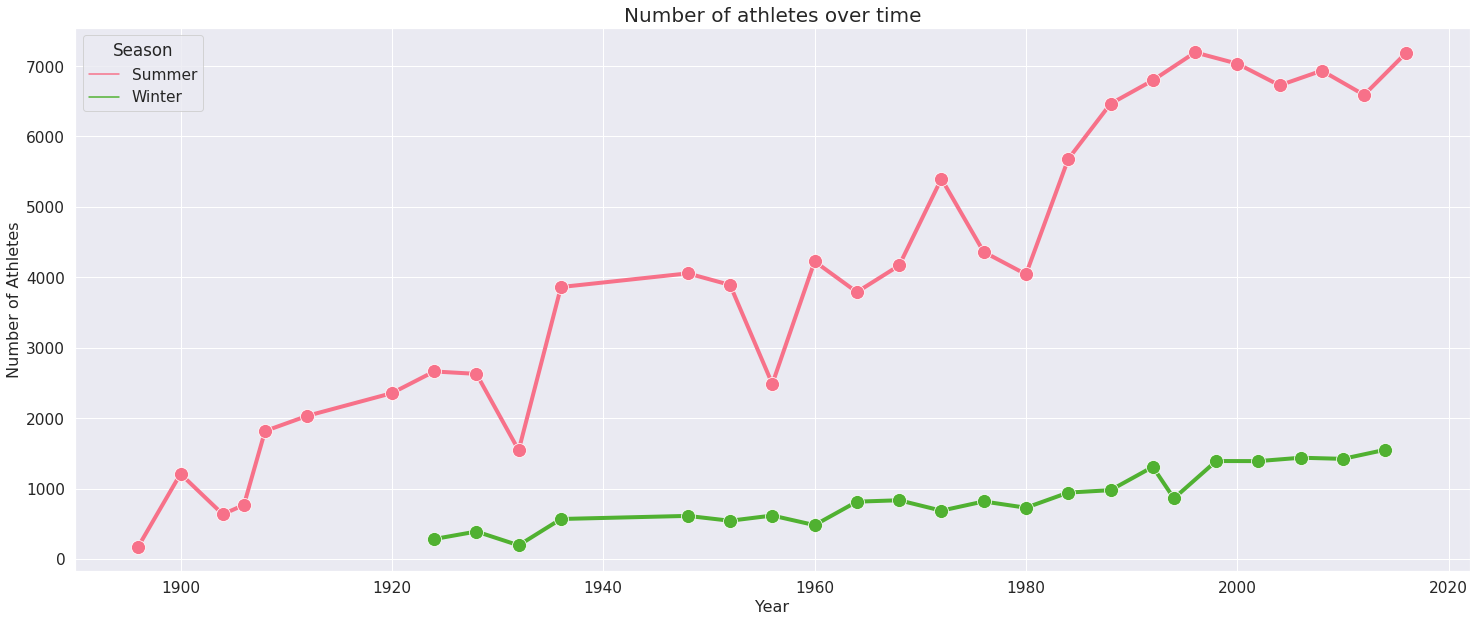

In [8]:
from matplotlib import markers
#Number of athletes over years.
sns.set_style("whitegrid")
sns.set(font_scale=1.4)
results = unique.groupby(['Season','Year']).count()
results
colour = sns.set_palette("husl",3)
plt.figure(figsize=(25, 10))
sns.lineplot(x="Year", y="ID", hue="Season", data=results, palette=colour, linewidth=4, marker="o", markersize=14)
#styling individual elements of the plot
plt.xlabel('Year', fontsize=16);
plt.ylabel('Number of Athletes', fontsize=16);
plt.title('Number of athletes over time', fontsize=20)

From the graphical representation we can see that the number of athletes increased drastically since the inception of Olympic games. There are few possible reasons for this: 


1.   First one is pretty obvious and straightforward. The population on our planet has significantly increased and there.
2.   There are more an more people interested in sports => more those who will achieve high level of sports proficiency and participate in Olimpic games
3.   We can see that since 1980s number of athletes increased alot as well. It may be due to the fact that mass media has began to rise in popularity and countries statrted to promote healthy lifestyle.
4. Another contributing factor is that number of sports increased as well

However we can see a few drops in the plot. To be exact these are 1932 (L.A.), 1956 (Melbourne), 1976 (Montreal), 1980 (Moscow). 

In case of 1932 the time of Olympics happened at the same time as the Great Depression so that many athletes were unable to participate in the competition.

Another 3 mentioned dates saw less attendees because quite a large number of countries boycotted the games.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


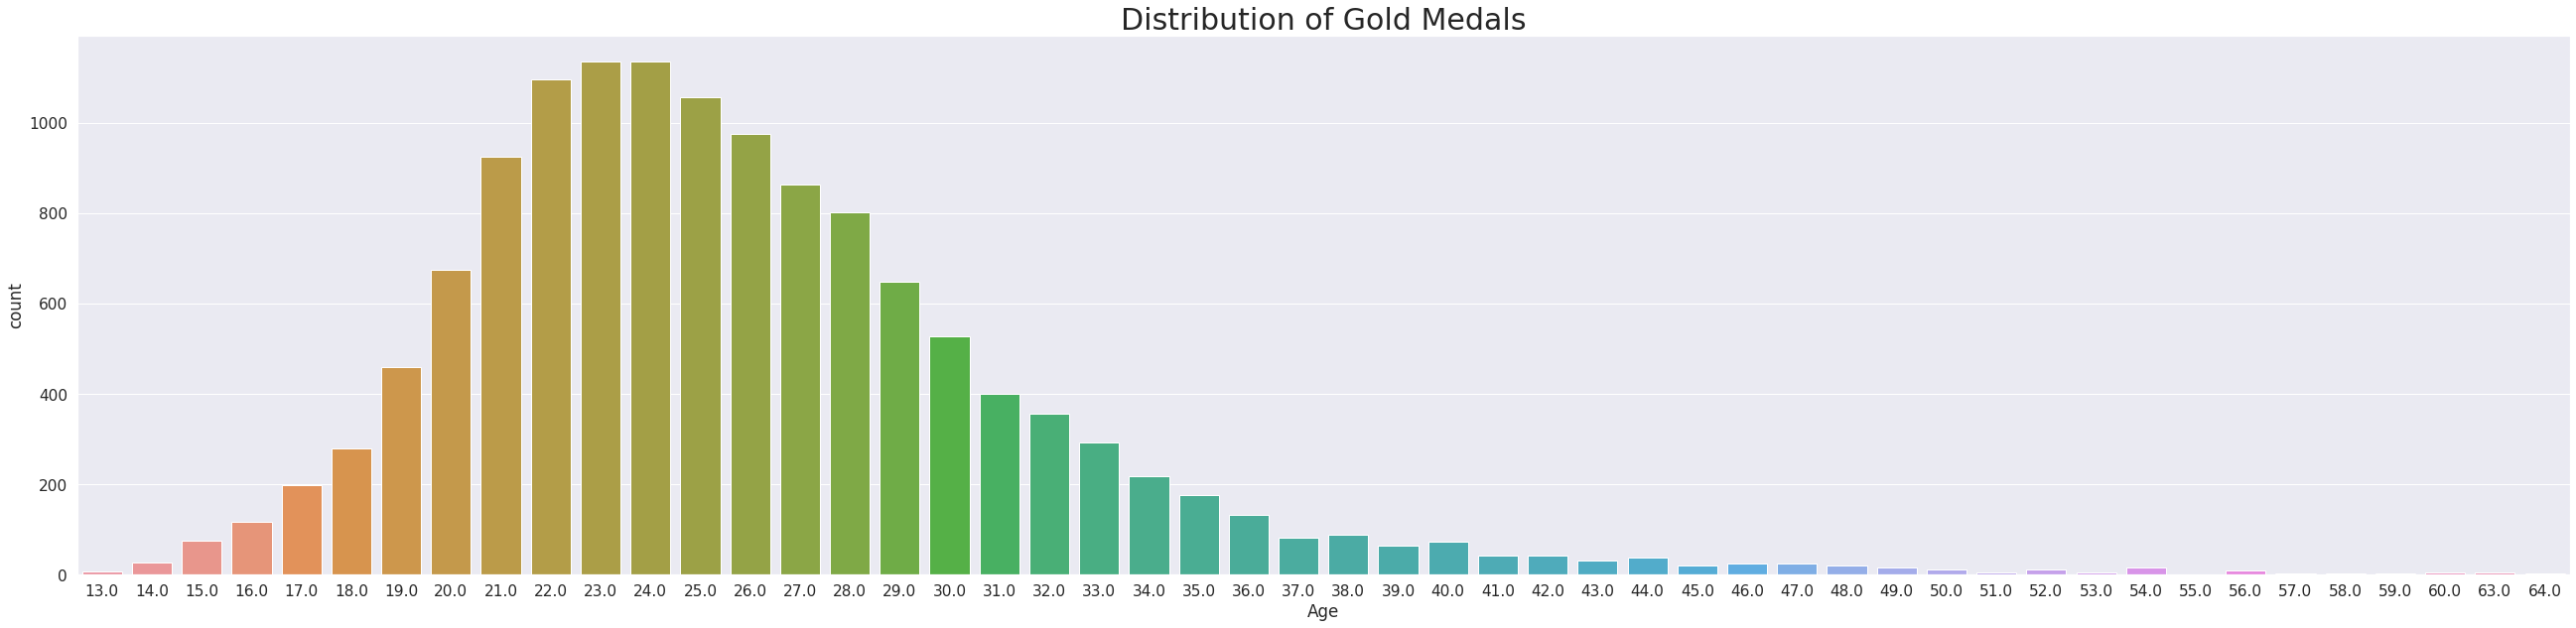

In [9]:
#Representation of medals depending on the age of an athlete (same ID possible due to the fact that one athlete can win multiple times). 
#Looking at this representations we can test a hypothesis based on prediction that older athletes tend to recieve less gold medals.
GoldMedalists = df[(df.Medal == 'Gold')]
GoldMedalists
plt.figure(figsize=(45, 10))
plt.title('Distribution of Gold Medals', fontsize=30)
sns.countplot(GoldMedalists['Age'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


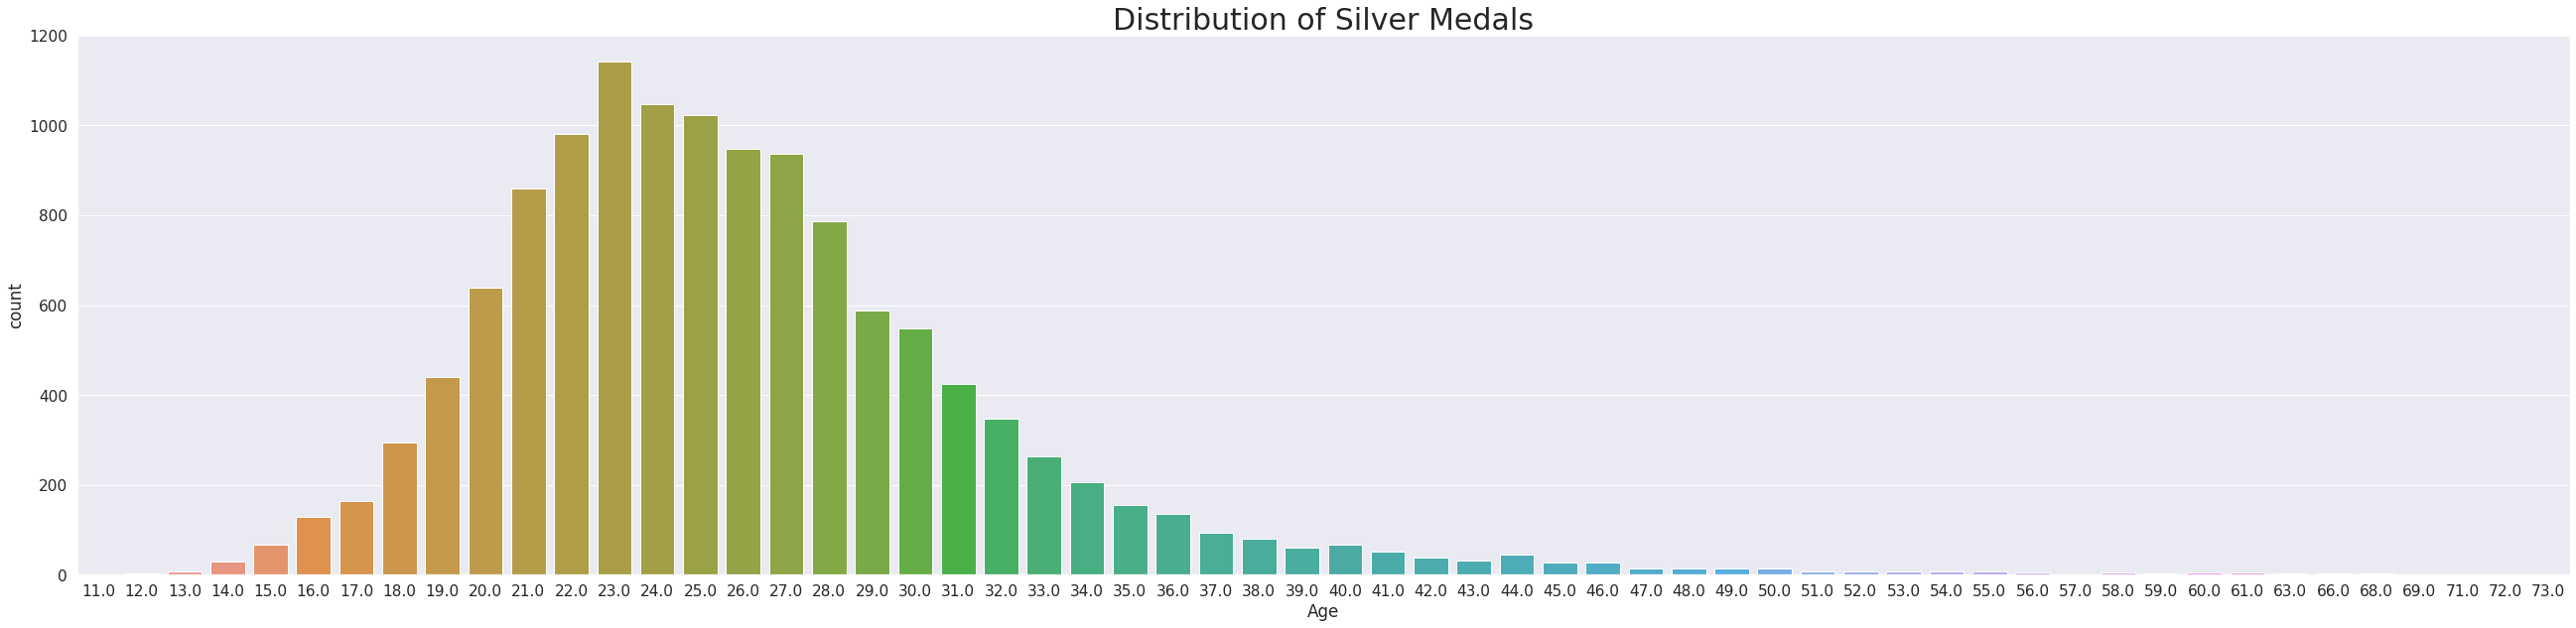

In [10]:
SilverMedalists = df[(df.Medal == 'Silver')]
SilverMedalists
plt.figure(figsize=(45, 10))
plt.title('Distribution of Silver Medals', fontsize=30)
sns.countplot(SilverMedalists['Age'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


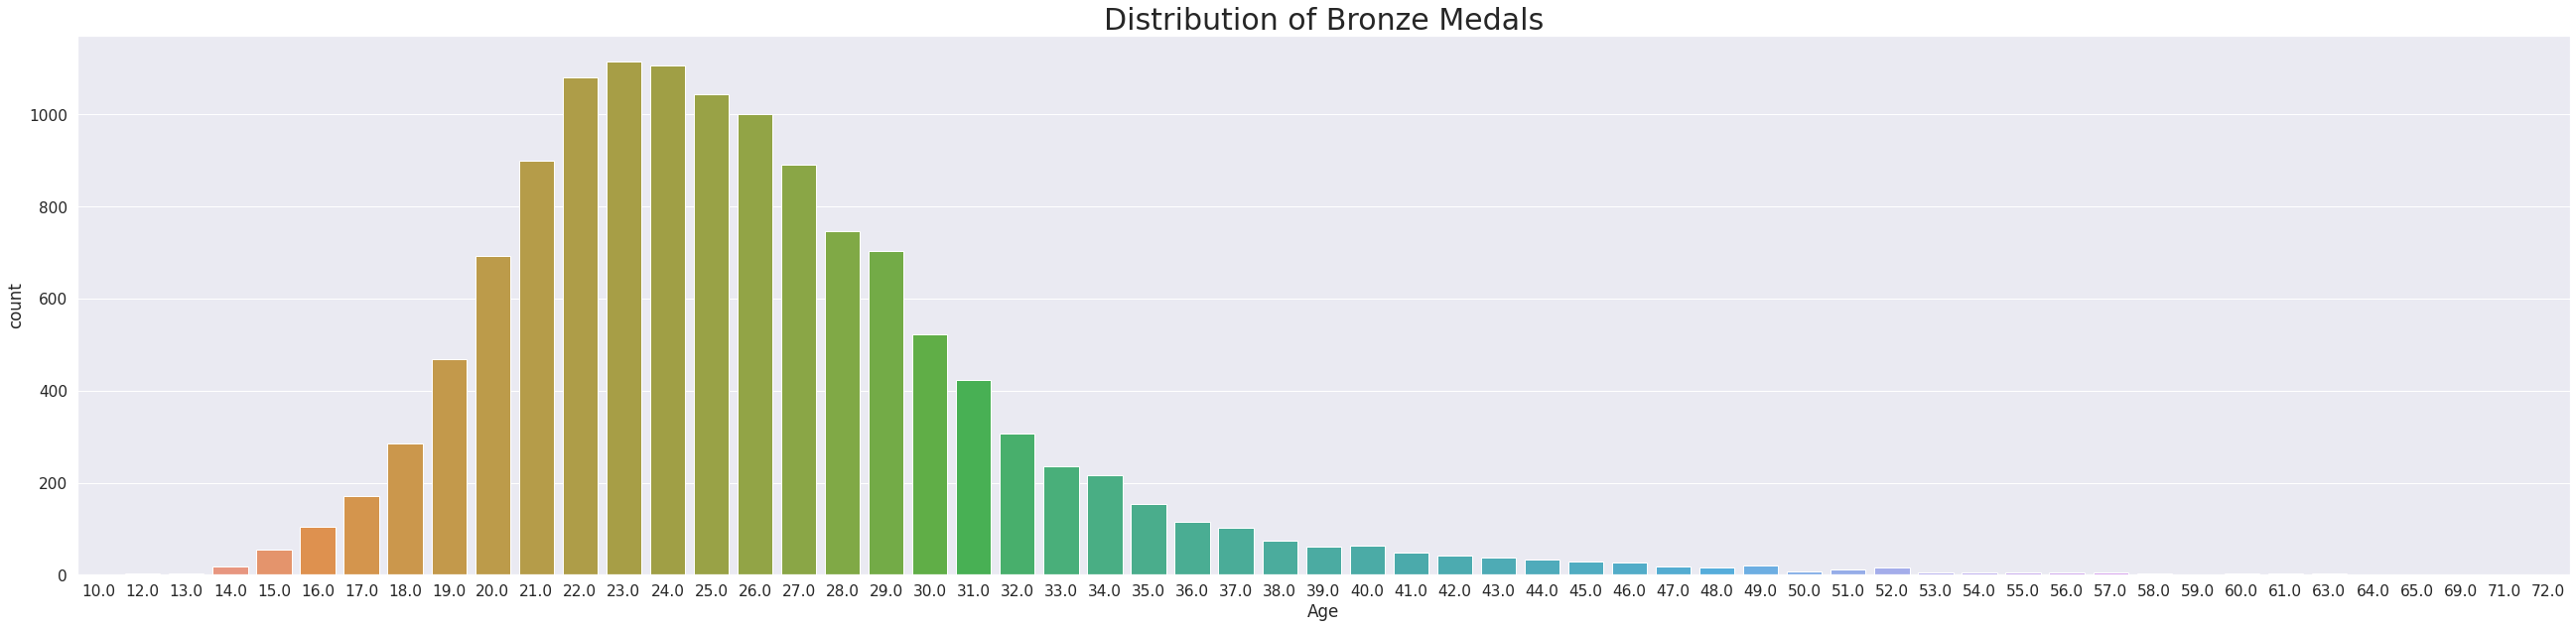

In [11]:
BronzeMedalists = df[(df.Medal == 'Bronze')]
BronzeMedalists
plt.figure(figsize=(45, 10))
plt.title('Distribution of Bronze Medals', fontsize=30)
sns.countplot(BronzeMedalists['Age'])
plt.show()

The idea behind making these 3 graphs were based on a hypothesis that older athletes are preforming worse than their younger competitors so that number of bronze and silver medals would be more than golds for older participants. However all 3 plots showed quite similar results. 

What we can see is that in fact younger athletes perform better as the vast majority of medals represnted across the age group of 22-24 years old. After 24 years old we can see a decline for each type of medal.

Text(0.5, 1.0, 'Best performing countries in the Olympics')

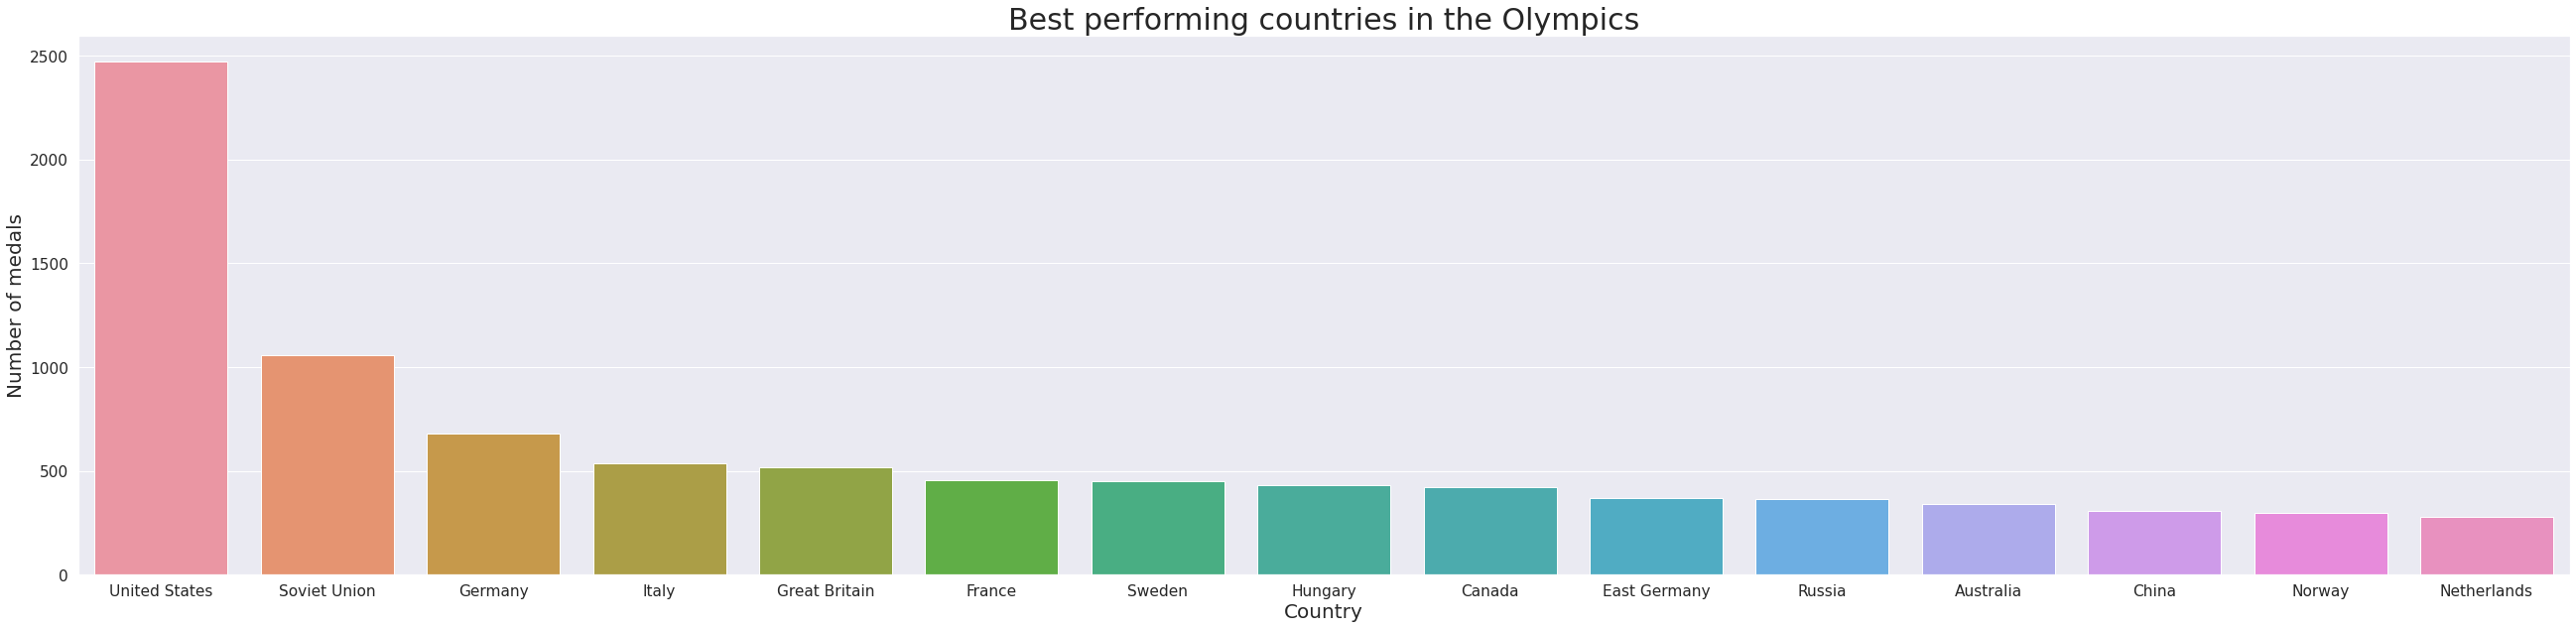

In [12]:
#Sorting data for plotting
countries = df[df['Medal']=='Gold']
gold = countries.groupby('Team', as_index = False)["Medal"].count()
top = gold.sort_values('Medal', ascending= False).head(15)
#Setting plot
plt.figure(figsize=(45, 10))
plots = sns.barplot(x="Team", y="Medal", data=top)
#styling individual elements of the plot
plt.xlabel('Country', fontsize=20);
plt.ylabel('Number of medals', fontsize=20);
plt.title('Best performing countries in the Olympics', fontsize=30)

**Now lets look at the best preforming countries.**

Here we can see a top 15 best performing countries at the Olympics. United States here takes a lead with a huge difference. Second place is given to the Soviet Union but some studies combine it with Russian results which is not right because Soviet Union consisted of many different countries not only Russia. 

Interestingly, we can see that there is only 1 Asian country among top 15 contenders which is China. Recently China saw an economic and political rise and started to perform extremely well at the Olympics. This may be the result of national interest and political narrative to show the World how great China is. Maybe in the future we will see more Asian countries at the top of Olympics as they are the new emerging economies.

Text(0.5, 1.0, 'Top 10 most popular sports by the number of athletes ever competed')

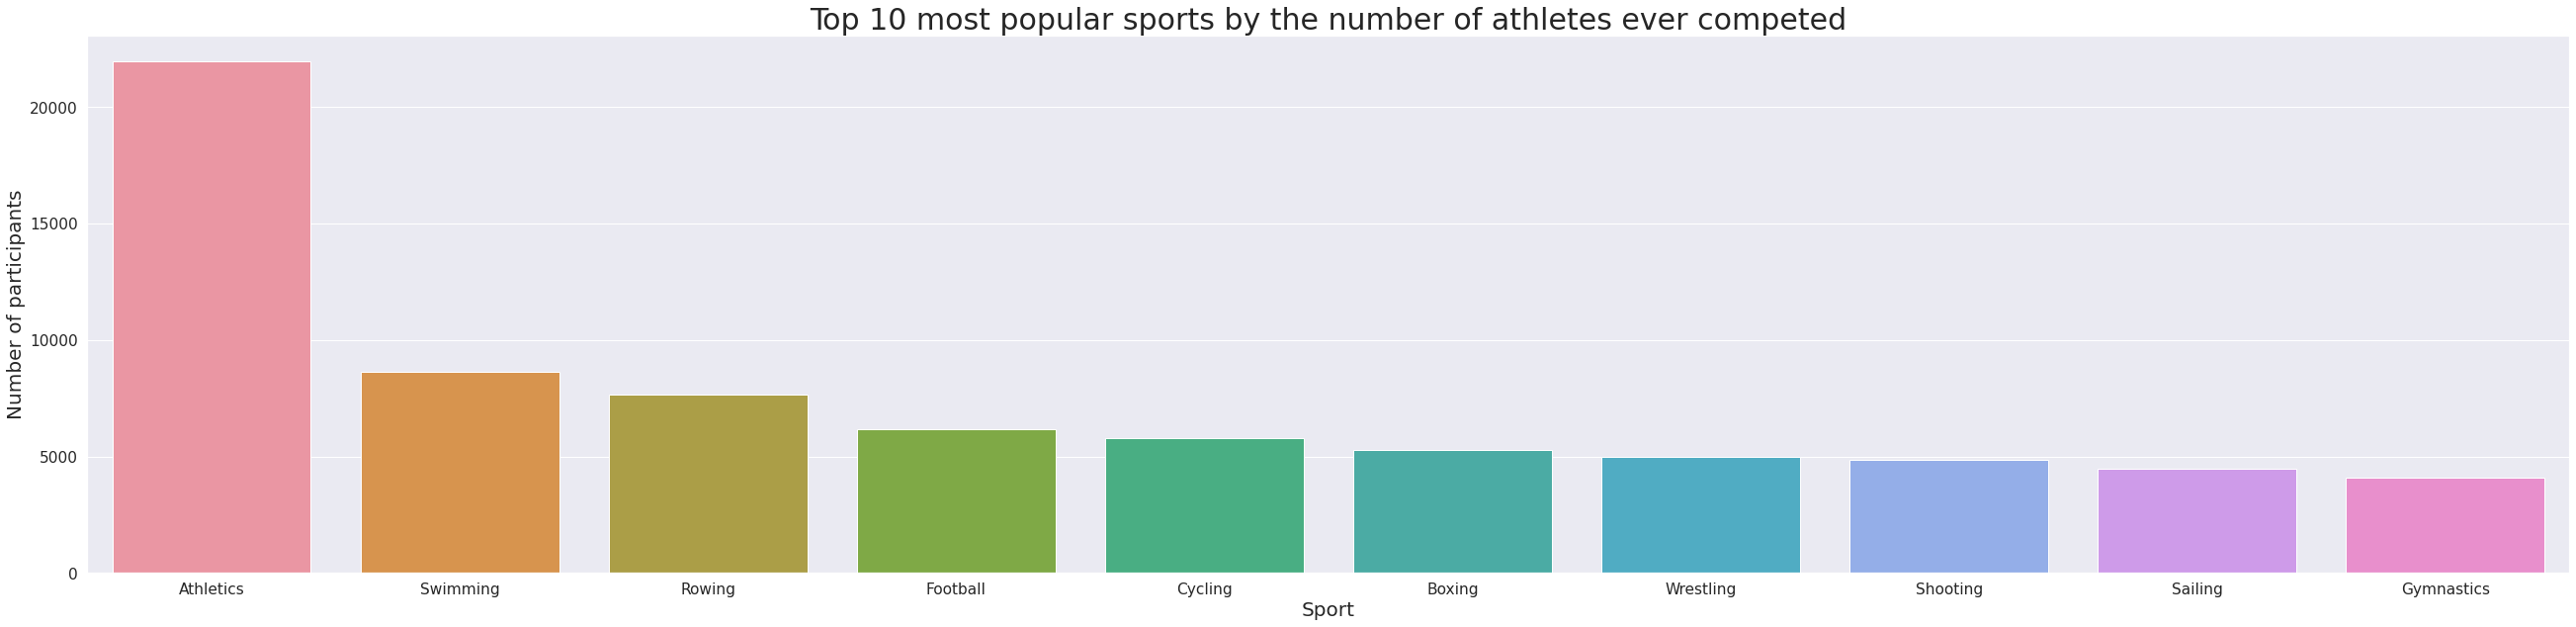

In [13]:
#Selecting top 10 most popular sports
sports = unique.groupby('Sport', as_index = False)["ID"].count()
top_sports = sports.sort_values('ID', ascending= False).head(10)
#Sizing plot
plt.figure(figsize=(45, 10))
plots = sns.barplot(x="Sport", y="ID", data=top_sports)
#styling individual elements of the plot
plt.xlabel('Sport', fontsize=20);
plt.ylabel('Number of participants', fontsize=20);
plt.title('Top 10 most popular sports by the number of athletes ever competed', fontsize=30)

On the plot above we can see which sports are the most popular in the Olymics. All top 10 sports are held during summer games. 

Summer Olymics historically way more popular than winter games we can see that from one of the previous plots that showed the number of athletes.

Text(0.5, 1.0, 'Top 10 least popular sports by the number of athletes ever competed')

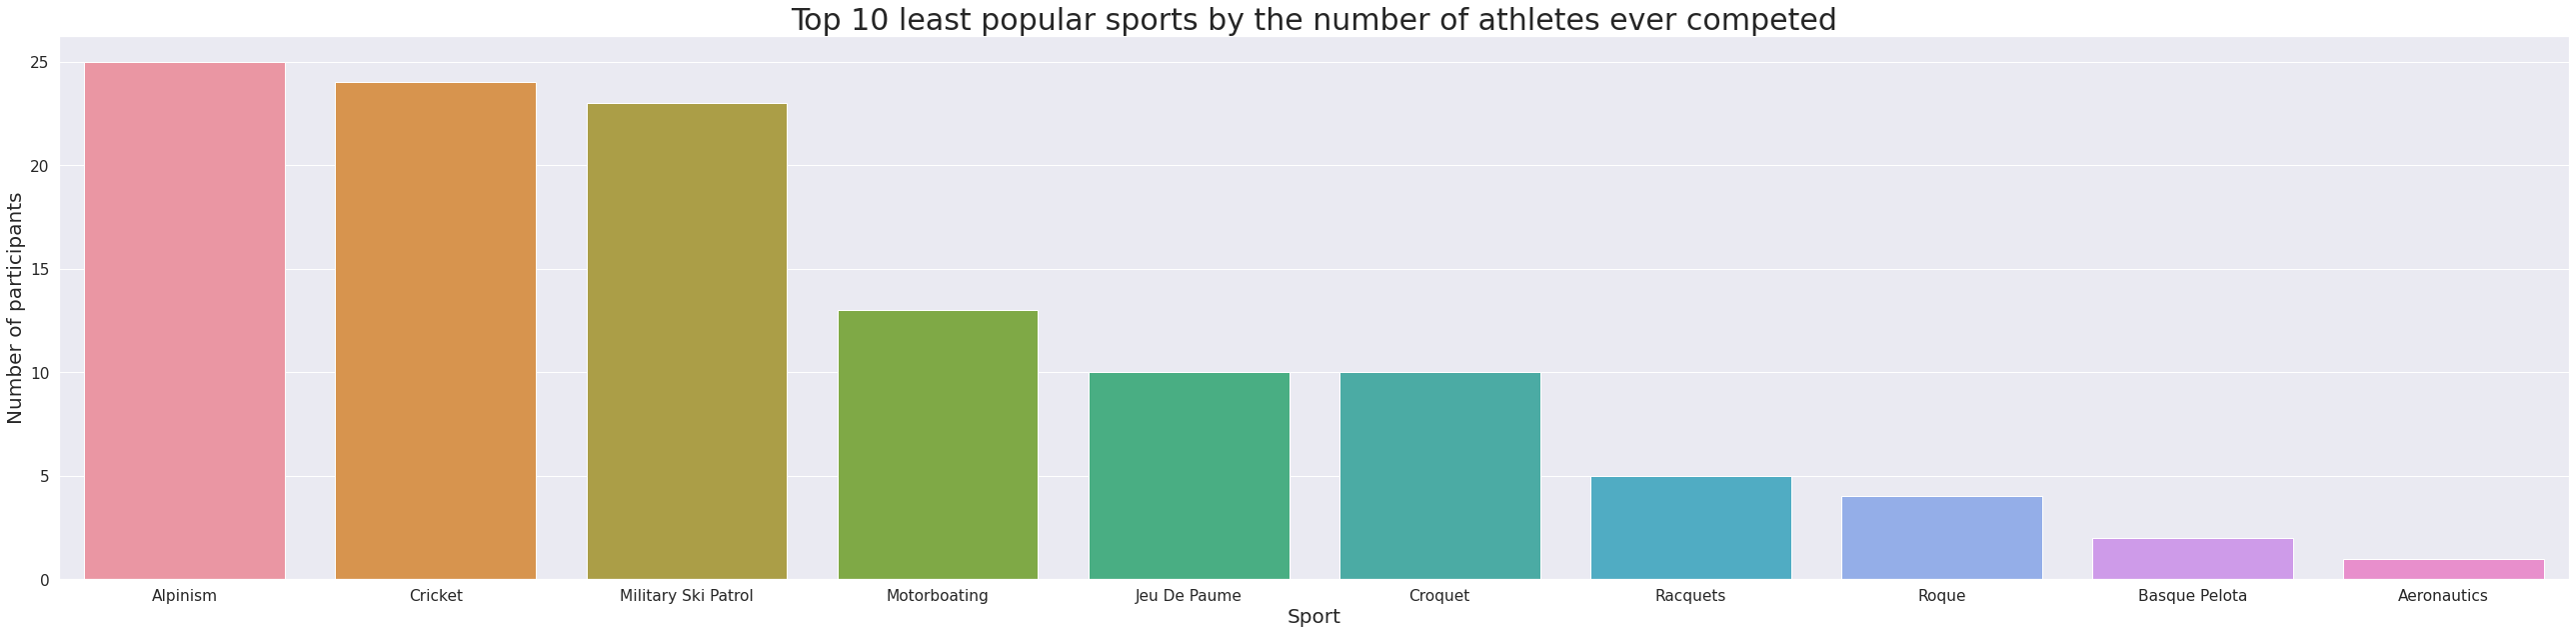

In [49]:
#Selecting top 10 least popular sports
sports = unique.groupby('Sport', as_index = False)["ID"].count()
last_sports = sports.sort_values('ID', ascending= False).tail(10)
#Sizing plot
plt.figure(figsize=(45, 10))
plots = sns.barplot(x="Sport", y="ID", data=last_sports)
#styling individual elements of the plot
plt.xlabel('Sport', fontsize=20);
plt.ylabel('Number of participants', fontsize=20);
plt.title('Top 10 least popular sports by the number of athletes ever competed', fontsize=30)

It is more interesting to look at the least popular sports. 
Here we can see some unique and old-fashioned sports. 

For example **Basque Pelota** which originated in the 13th century and is a variety of court sports played with a ball using one's hand, a racket, a wooden bat or a basket, against a wall.

Another interesitng sport is **Military Ski Patrol** event was held at the Olympic Winter Games in 1928, 1936, and 1948 as a demonstration sport. The event was also contested at the 1924 Olympic Winter Games in Chamonix and, until recently, had always been considered a demonstration event. But more recent evidence makes it clear that this was a full medal event in 1924, and not a demonstration. **Military ski patrol** is an event similar to team biathlon, in which all the team members ski together over a course, stopping periodically to shoot at targets. The event is still held at World Military Skiing Championships, but no international federation exists for the sport.

# Favorite winter sport - Snowboarding 🏂

It's winter time so I wanted to make a deeper analysis on one of my fav. sport activity - Snowboarding. Firstly, I 'll inroduce some overall facts about this sport at the Olympics and then we'll look more deeply into the performance of Team Russia

At first lets analyse the data and see what facts we can get from this subset

In [45]:
#Loading initial data
df
#Sorting out only those who participated in snowboarding
Snowboard = df[(df.Sport == 'Snowboarding')]
#Calculating the year which was the first to host snowbarding
first_year = Snowboard['Year'].min()
#Deleting the duplicates to see how many different athletes took part in snowboarding since its first appearence in the Olymics
Unique_Snowboarders = Snowboard.drop_duplicates(subset=['ID'])
snowboarders_number = len(Unique_Snowboarders["ID"])
# Determining the number of nations that participated in snowboarding
Unique_Snowboarders_country = Snowboard.drop_duplicates(subset=['NOC'])
snowboarders_country_number = len(Unique_Snowboarders_country["NOC"])
#Creating a new dataset to check snowboarders stats
Unique_Snowboarders_info = Unique_Snowboarders[Unique_Snowboarders['Height'].notna() & Unique_Snowboarders['Weight'].notna()]
#Subset for males
Unique_Snowboarders_info_M = Unique_Snowboarders_info[(Unique_Snowboarders_info['Sex'] == 'M')]
#Calculating stats for male athletes
Mean_M_Height = Unique_Snowboarders_info_M['Height'].mean()
Mean_M_Weight = Unique_Snowboarders_info_M['Weight'].mean()
Mean_M_Age = Unique_Snowboarders_info_M['Age'].mean()
#Subset for females
Unique_Snowboarders_info_F = Unique_Snowboarders_info[(Unique_Snowboarders_info['Sex'] == 'F')]
#Calculating stats for female athletes
Mean_F_Height = Unique_Snowboarders_info_F['Height'].mean()
Mean_F_Weight = Unique_Snowboarders_info_F['Weight'].mean()
Mean_F_Age = Unique_Snowboarders_info_F['Age'].mean()
#Printing out the results
print('Snowboarding as Olympic sport first time was introduced on',first_year,'which refers to The Nagano Games held in Japan')
print('The number of people who participated in Olympics snowboarding since', first_year,'is -', snowboarders_number)
print('Only', snowboarders_country_number, 'countries participated in snowboarding competitions so far')
print('Male athletes who participate in Oplympics snowboarding weights', Mean_M_Weight, 'kilograms, are', Mean_M_Height, 'centimiters tall',Mean_M_Age,'years old on average')
print('Female athletes who participate in Oplympics snowboarding weights', Mean_F_Weight, 'kilograms, are', Mean_F_Height, 'centimiters tall and', Mean_F_Age,'years old on average')

Snowboarding as Olympic sport first time was introduced on 1998 which refers to The Nagano Games held in Japan
The number of people who participated in Olympics snowboarding since 1998 is - 567
Only 35 countries participated in snowboarding competitions so far
Male athletes who participate in Oplympics snowboarding weights 75.75700934579439 kilograms, are 178.00311526479751 centimiters tall 23.202492211838006 years old on average
Female athletes who participate in Oplympics snowboarding weights 60.13135593220339 kilograms, are 166.3093220338983 centimiters tall and 23.177966101694917 years old on average


**Now lets see how countries perform and determine which country has the most medals in this sport**

In [46]:
#Sorting out only snowboarding medalists
results = Snowboard[Snowboard['Medal'].notna()]
results_countries = results.groupby(['Team'], as_index = False)["Medal"].count()
sorted_results = results_countries.sort_values('Medal', ascending= False)

Text(0.5, 1.0, 'Total number of medals in snowboarding by country')

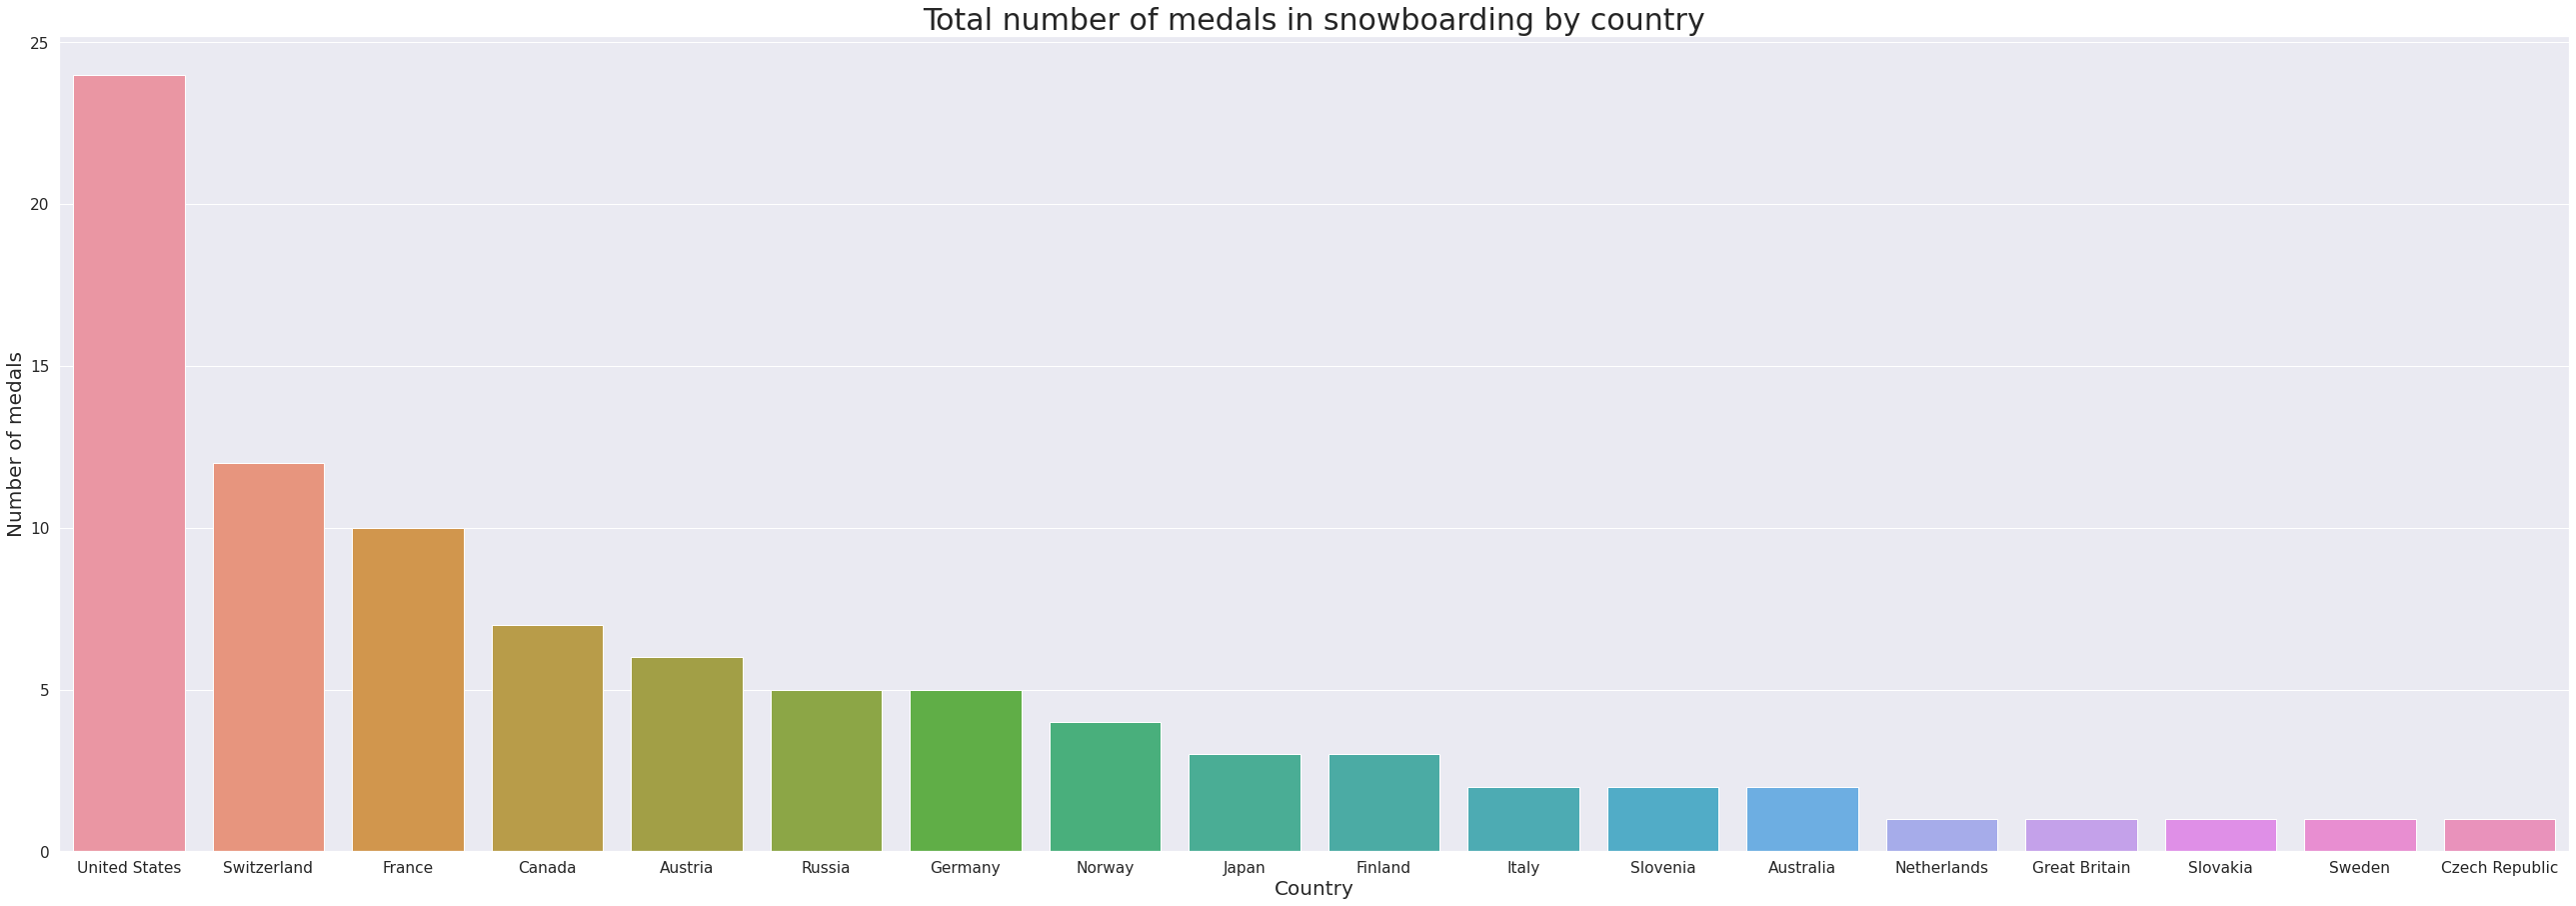

In [47]:
#creating a visualisation for our previous sorting
plt.figure(figsize=(45, 15))
sns.barplot(data=sorted_results, x="Team", y="Medal")
#styling individual elements of the plot
plt.xlabel('Country', fontsize=20);
plt.ylabel('Number of medals', fontsize=20);
plt.title('Total number of medals in snowboarding by country', fontsize=30)

**Results**
It is to no one's surprise that the United States takes the first place here. The country perform extremely well in almost all kinds of sports and winter sports are not the exception. 

Countries that are listed here all have snowy and mountain areas which is essential if you want to train snowboarding. Here the only Asian country is Japan which can be explained by the fact that they hosted the first winter olymics with snowboarding so that the team had to prepare well and not let the country down.

Russia doesn't have an oustanding record when it comes to the snowboarding however the team has got a total of 5 medals so far and takes the 6th place in the World.

#Russian Snowboarding performance

Further in this part lets analyse the performance of Russian team in snowboarding.

In [53]:
#Creating a new subest for Russian snowboarders
Russian_snowboarders = unique[(unique.Sport == 'Snowboarding')&(df.NOC == 'RUS')]
#Sorting athletes in regards to years to see how many new participants joined every year
sorted_Russian_snowboarders = Russian_snowboarders.groupby('Year', as_index = False)["ID"].count()
sorted_Russian_snowboarders

<ipython-input-53-641b4906dc51>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Russian_snowboarders = unique[(unique.Sport == 'Snowboarding')&(df.NOC == 'RUS')]


,Year,ID
0,2002,1
1,2006,8
2,2010,4
3,2014,10


In the table above we can see the number of unique athletes on a Russian team that took part in snowboarding. in 2002 it was only athlete competeing for Team Russia in this sport but over time more athletes took part in Snowboarding. 

The most number of new athletes joined the team in 2014 when the Winter Olymics were held in Sochi, Russia. To add up the team took most of its meadl during that time.

Text(0.5, 1.0, 'How many new Russian athletes took part in Snowboarding competitions each year')

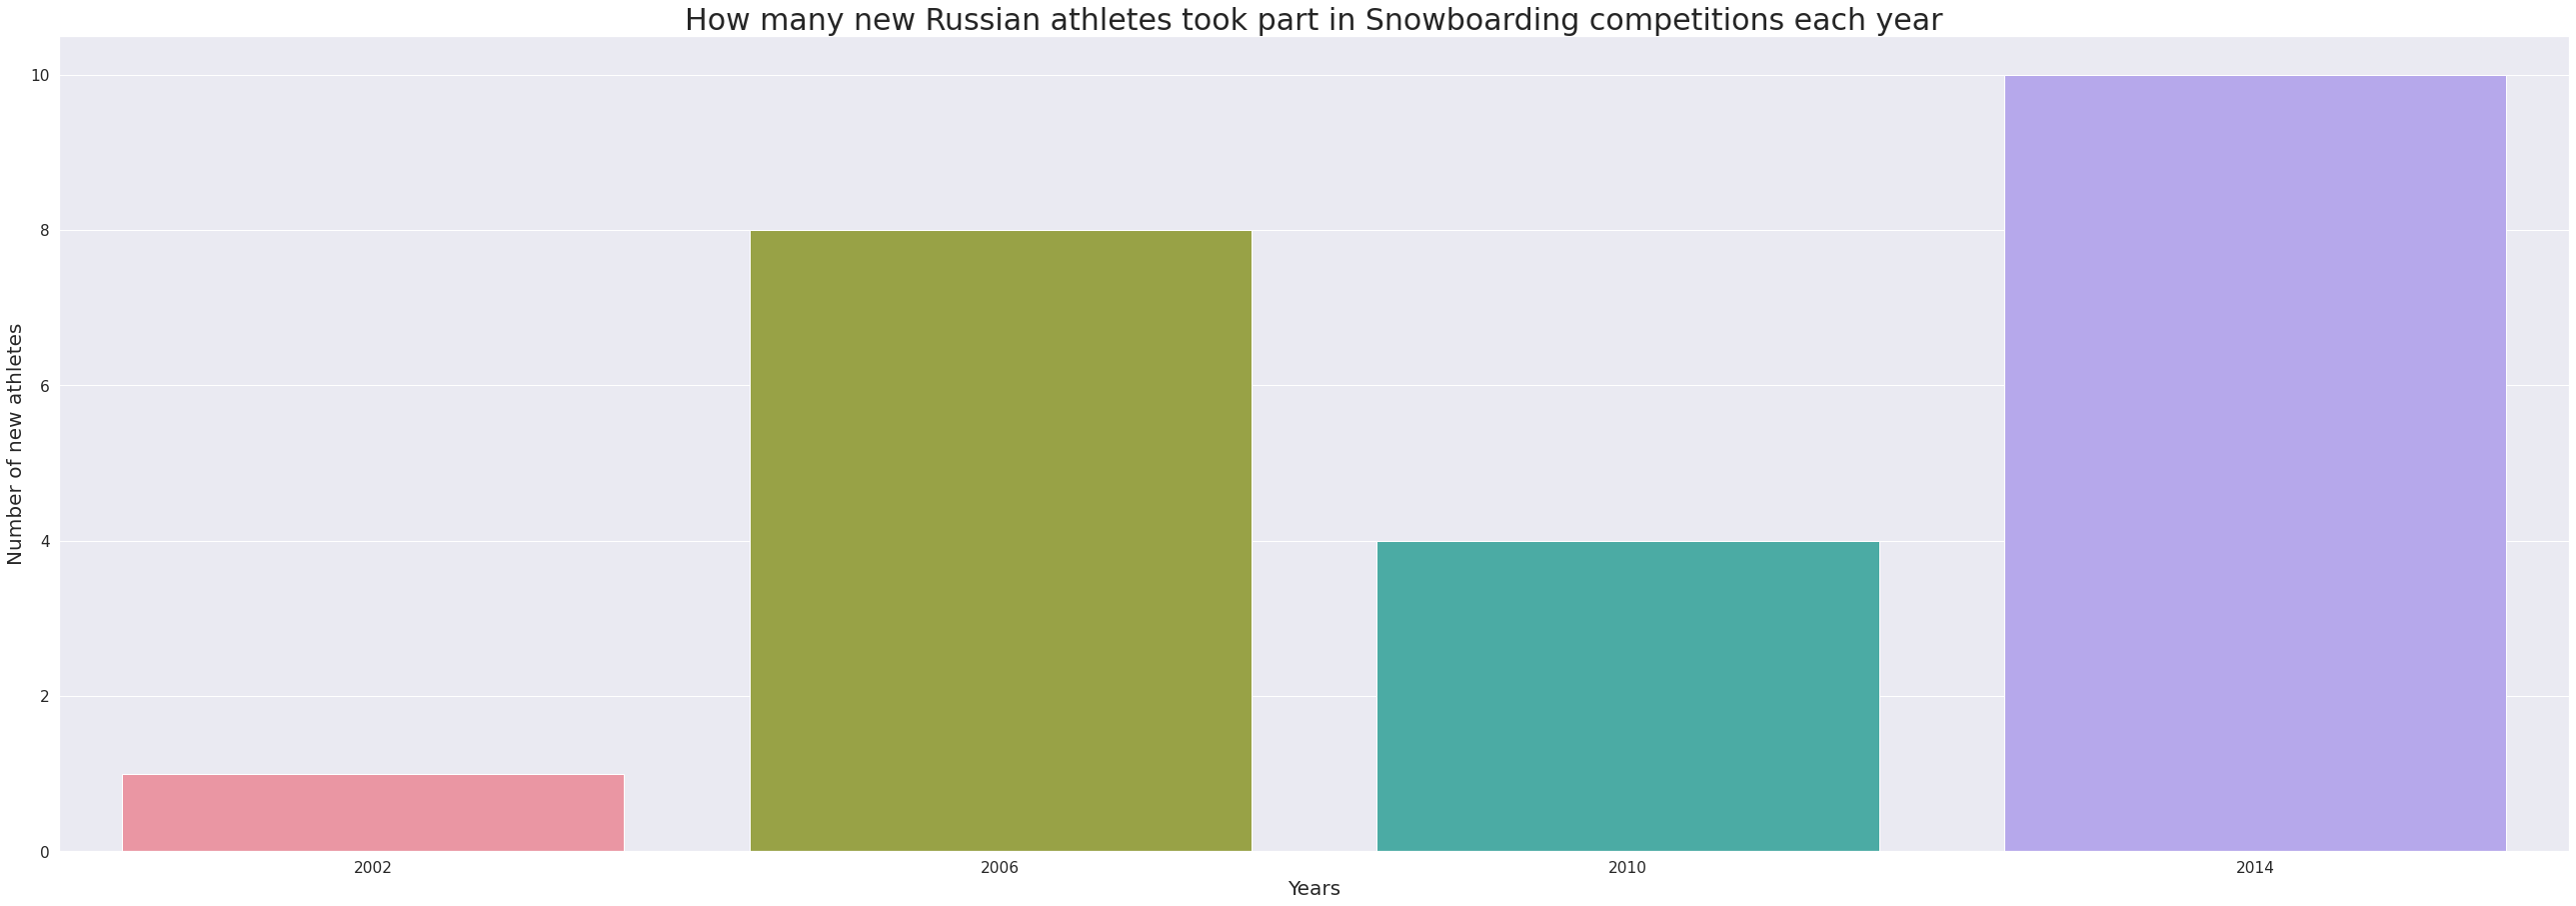

In [54]:
#Visualising our previous sorting
plt.figure(figsize=(45, 15))
sns.barplot(data=sorted_Russian_snowboarders, x="Year", y="ID")
#styling individual elements of the plot
plt.xlabel('Years', fontsize=20);
plt.ylabel('Number of new athletes', fontsize=20);
plt.title('How many new Russian athletes took part in Snowboarding competitions each year', fontsize=30)

Here is the graphical representation of the previous table.

In [55]:
#Creating a new subest for Russian snowboarders who won any medals
Russian_snowboarders_medals = df[(df.Sport == 'Snowboarding')&(df.NOC == 'RUS')]
Russian_snowboarders_medalists = Russian_snowboarders_medals[Russian_snowboarders_medals['Medal'].notna()]
Russian_snowboarders_medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
102649,51929,Yekaterina Sergeyevna Ilyukhina,F,22.0,157.0,60.0,Russia,RUS,2010 Winter,2010,Winter,Vancouver,Snowboarding,Snowboarding Women's Parallel Giant Slalom,Silver
177080,89028,Nikolay Igorevich Olyunin,M,22.0,180.0,84.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Men's Boardercross,Silver
260571,130402,"Victor Ivan ""Vic"" Wild",M,27.0,179.0,82.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Men's Parallel Giant Slalom,Gold
260572,130402,"Victor Ivan ""Vic"" Wild",M,27.0,179.0,82.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Men's Parallel Slalom,Gold
268063,134105,Alyona Igorevna Zavarzina,F,24.0,175.0,60.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Women's Parallel Giant Slalom,Bronze


And finally here are all medalists for Team Russia. We can see that all except 1 medals were acquired in 2014 in Sochi there Russian team really shined in Snowboarding winning 2 gold, 1 silver and 1 bronze medal.